In [1]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder \
    .appName("DataProcessing") \
    .getOrCreate()

In [3]:
gny_df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/store/hust/big data integration/work/gny_df_3.csv', header=True)
gid_df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/store/hust/big data integration/work/gid_df_3.csv', header=True)

In [4]:
gny_df.createOrReplaceTempView("gny_df")
gid_df.createOrReplaceTempView("gid_df")

thang logarit: https://www.statology.org/pandas-histogram-log-scale/

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
def draw_chart(df, title, ylabel, logy=False):
  ps = df.toPandas()
  ps['NY'] = pd.to_numeric(ps['NY'])
  ps['ID'] = pd.to_numeric(ps['ID'])
  ps.set_index('description', inplace=True)
  ps.plot(kind='bar', logy=logy)
  plt.title(title)
  plt.xlabel('Section')
  plt.ylabel(ylabel)
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=8)
  plt.show()
  pass

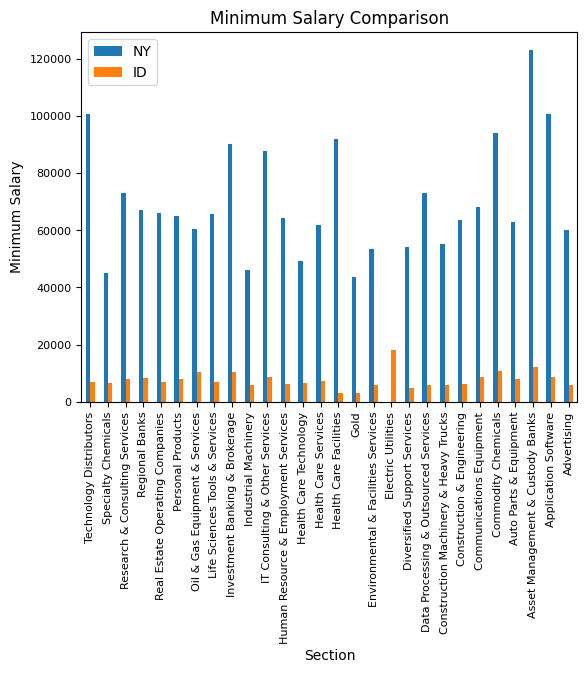

In [17]:
query = "SELECT ny.description, ny.min_salary as NY, id.min_salary as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
min_salary = spark.sql(query).collect()
min_salary = spark.createDataFrame(min_salary)
draw_chart(min_salary, 'Minimum Salary Comparison', 'Minimum Salary')
#

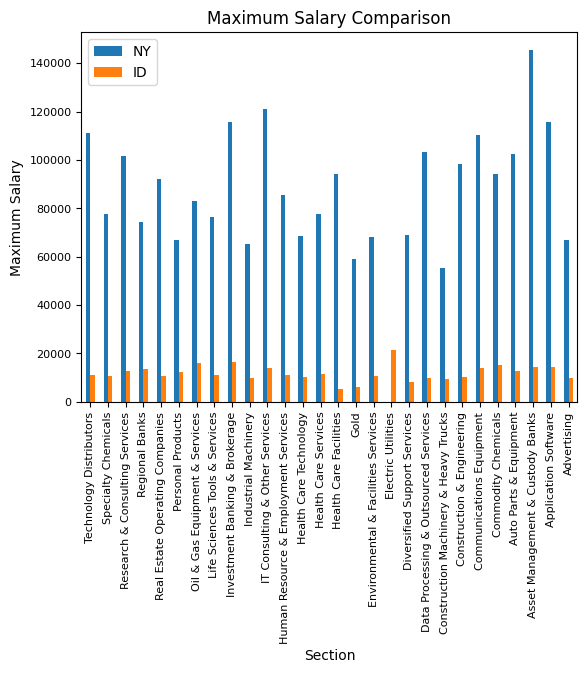

In [7]:
query = "SELECT ny.description, ny.max_salary as NY, id.max_salary as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
max_salary = spark.sql(query).collect()
max_salary = spark.createDataFrame(max_salary)
draw_chart(max_salary, 'Maximum Salary Comparison', 'Maximum Salary')
#


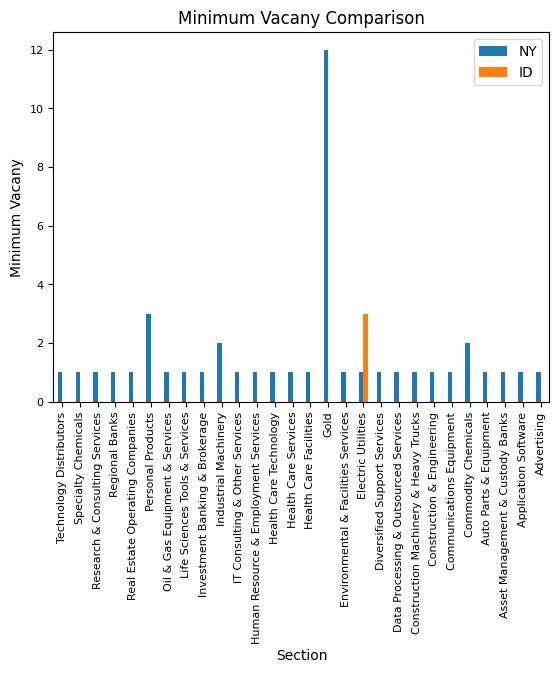

In [18]:
query = "SELECT ny.description, ny.min_vacany as NY, id.min_vacany as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
min_vacany = spark.sql(query).collect()
min_vacany = spark.createDataFrame(min_vacany)
draw_chart(min_vacany, 'Minimum Vacany Comparison', 'Minimum Vacany')

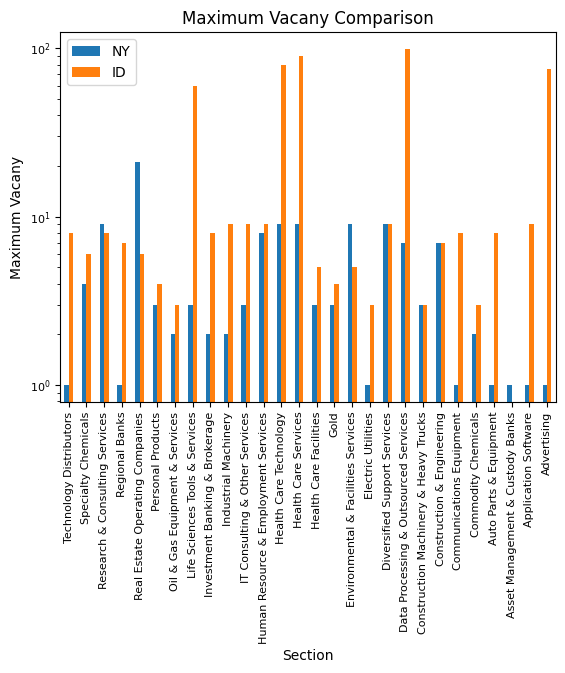

In [19]:
query = "SELECT ny.description, ny.max_vacany as NY, id.max_vacany as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
max_vacany = spark.sql(query).collect()
max_vacany = spark.createDataFrame(max_vacany)
draw_chart(max_vacany, 'Maximum Vacany Comparison', 'Maximum Vacany', True)
#

In [10]:
#gny_df.createOrReplaceTempView("gny_df")
#gid_df.createOrReplaceTempView("gid_df")

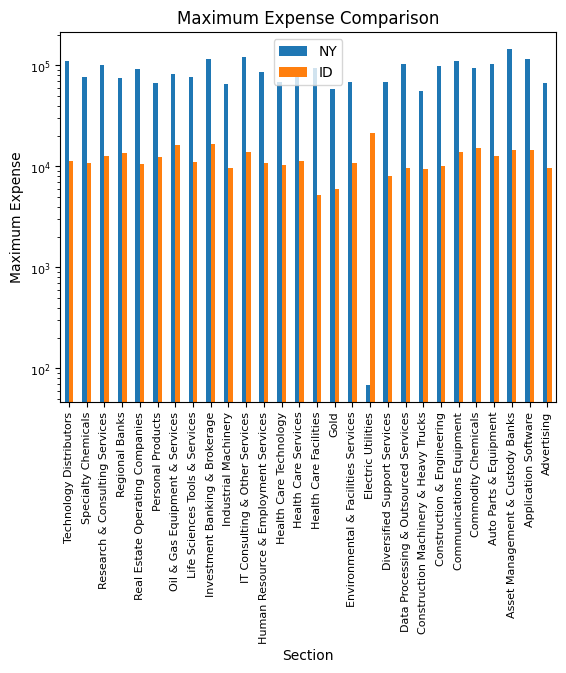

In [11]:
query = "SELECT ny.description, ny.max_expense as NY, id.max_expense as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
max_expense = spark.sql(query).collect()
max_expense = spark.createDataFrame(max_expense)
draw_chart(max_expense, 'Maximum Expense Comparison', 'Maximum Expense', True)
#

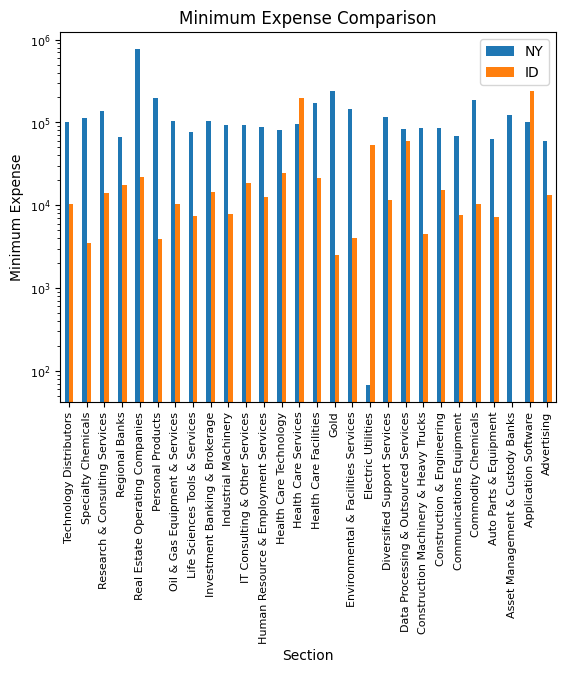

In [12]:
query = "SELECT ny.description, ny.min_expense as NY, id.min_expense as ID \
 FROM gny_df ny inner join gid_df id on ny.description = id.description \
 order by ny.description desc"
min_expense = spark.sql(query).collect()
min_expense = spark.createDataFrame(min_expense)
draw_chart(min_expense, 'Minimum Expense Comparison', 'Minimum Expense', True)

In [13]:
max_expense.sort('description', ascending=True).select('description', 'NY', 'ID').show(30)

+--------------------+------------------+------------------+
|         description|                NY|                ID|
+--------------------+------------------+------------------+
|         Advertising|           67001.0| 9739.720077328646|
|Application Software|          115855.0|14417.553002223869|
|Asset Management ...|          145601.0|           14400.0|
|Auto Parts & Equi...|          102581.4| 12541.86045762712|
| Commodity Chemicals|           94072.0|15388.615384615385|
|Communications Eq...|          110158.0|14043.625641025641|
|Construction & En...| 98446.59560344824|10083.204787234043|
|Construction Mach...|           55228.6|  9332.23880597015|
|Data Processing &...|103156.07164835164| 9707.849701573521|
|Diversified Suppo...| 68963.48784172662| 8065.528517110266|
|  Electric Utilities|             68.72|           21603.0|
|Environmental & F...|      68312.030625|10742.585365853658|
|                Gold|59060.333333333336|            6015.8|
|Health Care Facil...|  

In [14]:
min_expense.sort('description', ascending=True).select('description', 'NY', 'ID').show(30)


+--------------------+------------------+------------------+
|         description|                NY|                ID|
+--------------------+------------------+------------------+
|         Advertising|           60000.0|13193.038481546573|
|Application Software|          100743.0|238434.30689399556|
|Asset Management ...|          123200.0|               0.0|
|Auto Parts & Equi...|           62729.8| 7265.338983050848|
| Commodity Chemicals|          188140.0| 10269.23076923077|
|Communications Eq...|           68089.0| 7536.923076923077|
|Construction & En...| 85651.46272988502|15190.053191489362|
|Construction Mach...| 84691.13333333333| 4544.776119402985|
|Data Processing &...| 82466.82998021979| 59468.64336625068|
|Diversified Suppo...|114676.52330935252|11544.638783269962|
|  Electric Utilities|             67.72|           54000.0|
|Environmental & F...|143849.52125000002|4017.0731707317073|
|                Gold|          238862.0|            2475.0|
|Health Care Facil...|  

In [15]:
gid_df.show(5)

+--------------------+------------------+------------------+----------+----------+------------------+------------------+
|         description|        min_salary|        max_salary|min_vacany|max_vacany|       min_expense|       max_expense|
+--------------------+------------------+------------------+----------+----------+------------------+------------------+
|IT Consulting & O...| 8674.652985133796|14030.188305252725|         0|         9| 18388.24578790882| 14033.98364717542|
|Industrial Machinery| 5810.163934426229| 9634.426229508197|         0|         9| 7863.934426229508|            9638.0|
|Integrated Teleco...| 5884.615384615385|10232.307692307691|         0|         5| 91878.46153846153|           10259.4|
|Interactive Media...| 4421.538461538462| 7263.076923076923|         0|        85| 6772.307692307692| 7266.410256410257|
|Internet & Direct...|6474.1463414634145| 10242.19512195122|         0|         8|10033.414634146342|10245.439024390244|
+--------------------+----------

In [16]:
gny_df.show(5)

+--------------------+------------------+-----------------+----------+----------+-----------------+------------------+
|         description|        min_salary|       max_salary|min_vacany|max_vacany|      min_expense|       max_expense|
+--------------------+------------------+-----------------+----------+----------+-----------------+------------------+
|Health Care Services|61728.773630913354|77789.57057985949|         1|         9|96038.00548103046| 77791.19118875878|
|Health Care Techn...| 49113.58636363636|68542.35454545455|         1|         9|         82005.95| 68544.08181818182|
|Human Resource & ...|  64235.7357531746|85691.39549550264|         1|         8|86904.23728227513| 85692.91136851851|
|IT Consulting & O...|  87854.3606557377|120953.5606557377|         1|         3|93691.30327868853|120954.63442622952|
|Industrial Machinery|           46019.0|          65262.0|         2|         2|          92038.0|           65264.0|
+--------------------+------------------+-------